### 線形回帰
高次元のデータセットに対して過剰適合になりやすい（訓練データに対しての**過剰適合**の可能性が高くなる）

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
lr = LinearRegression().fit(X_train, y_train)
print('傾き：{}'.format(lr.coef_))
print('切片：{}'.format(lr.intercept_))

傾き：[0.39390555]
切片：-0.031804343026759746


In [10]:
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

0.6700890315075756
0.65933685968637


In [13]:
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

0.9520519609032729
0.607472195966585


### リッジ回帰
正則化された線形回帰の一つで、線形回帰に「学習した重みの二乗（L2正則化項）」を加えたもの」<br>
α（alpha）の値を増やすことでL2正則化項の値を大きくして正則化の強さを引き上げ、モデルの重みが小さくなるようにする<br>
alphaは係数を0に向かわせる強さを制御する正則化パラメータ(αが大きくなるほど正則化が強まる)
#### 正則化
- モデルが簡潔になる（係数が0に近いかもしくは0）
- 訓練データに対しての適合率が低くなる
- テストデータに対しての適合率が高くなる

In [15]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train, y_train)
print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))

0.8857966585170941
0.7527683481744755


In [17]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print(ridge10.score(X_train, y_train))
print(ridge10.score(X_test, y_test))

0.7882787115369614
0.6359411489177311


In [19]:
# alphaを小さくすればするほど、係数の制約が小さくなり、LinearRegressionと同じような挙動になる
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print(ridge01.score(X_train, y_train))
print(ridge01.score(X_test, y_test))

0.9282273685001987
0.7722067936479814


(-25.0, 25.0)

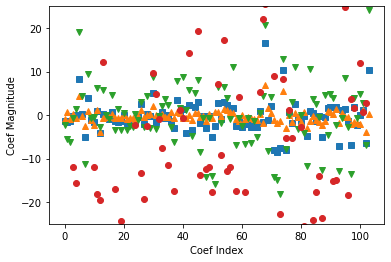

In [30]:
plt.plot(ridge.coef_, 's', label='Ridge alpha=1')
plt.plot(ridge10.coef_, '^', label='Ridge alpha=10')
plt.plot(ridge01.coef_, 'v', label='Ridge alpha=0.1')
plt.plot(lr.coef_, 'o', label='LinearRegression')

plt.xlabel('Coef Index')
plt.ylabel('Coef Magnitude')
plt.ylim(-25, 25)

### Lasso回帰
正則化された線形回帰の一つで、線形回帰に「重みの合計を足したもの（L1正則化項）」を加えたもの」<br>
不要と判断される説明変数の係数（重み）が0になる性質があり、モデル構築においていくつかの特徴量（説明変数）が完全に無視される<br>
alphaは係数を0に向かわせる強さを制御する正則化パラメータ

In [32]:
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train, y_train)
print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))
print('使用された特徴量の数：{}'.format(np.sum(lasso.coef_!=0)))

0.29323768991114607
0.20937503255272294
使用された特徴量の数：4


In [38]:
lasso001 = Lasso(alpha=0.01).fit(X_train, y_train)
print(lasso001.score(X_train, y_train))
print(lasso001.score(X_test, y_test))
print('使用された特徴量の数：{}'.format(np.sum(lasso001.coef_!=0)))

0.8961122320864717
0.7677995670886713
使用された特徴量の数：32


C:\ForDevelop\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 46.902458003173706, tolerance: 3.233182126649077
  model = cd_fast.enet_coordinate_descent(


In [39]:
lasso00001 = Lasso(alpha=0.0001).fit(X_train, y_train)
print(lasso00001.score(X_train, y_train))
print(lasso00001.score(X_test, y_test))
print('使用された特徴量の数：{}'.format(np.sum(lasso00001.coef_!=0)))

0.9420931515237063
0.6976541391663642
使用された特徴量の数：100


C:\ForDevelop\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 943.9983395915621, tolerance: 3.233182126649077
  model = cd_fast.enet_coordinate_descent(


Text(0, 0.5, 'Coef magnitude')

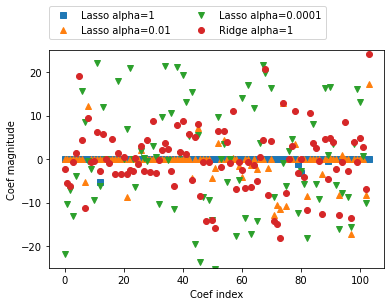

In [41]:
plt.plot(lasso.coef_, 's', label='Lasso alpha=1')
plt.plot(lasso001.coef_, '^', label='Lasso alpha=0.01')
plt.plot(lasso00001.coef_, 'v', label='Lasso alpha=0.0001')
plt.plot(ridge01.coef_, 'o', label='Ridge alpha=1')
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25,25)
plt.xlabel('Coef index')
plt.ylabel('Coef magnitude')